# Concatenated Dataset

In [28]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def define_day (day) :
    if (day == "weekends") :
        return True
    else :
        return False

airbnb_combined = pd.DataFrame()

for city_day in os.listdir("airbnb") :
   # print("airbnb/{}".format(city_day))
    df = pd.read_csv("airbnb/{}".format(city_day))
    df["city"] = city_day.split("_")[0]
    df["weekend"] = define_day(city_day.split("_")[1][:8])
    airbnb_combined = pd.concat([airbnb_combined, df])

airbnb_combined=airbnb_combined.reset_index(drop=True)
display(airbnb_combined)

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,weekend
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,Amsterdam,False
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,Amsterdam,False
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,Amsterdam,False
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,Amsterdam,False
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,Amsterdam,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,5374,1035.066676,Private room,False,True,2.0,False,0,1,10.0,...,5.155373,0.883829,271.191201,18.851558,528.042180,9.451035,-0.05357,51.51255,London,True
51703,5375,181.095510,Private room,False,True,2.0,False,1,0,10.0,...,5.072177,0.344055,268.165870,18.641255,554.906232,9.931855,-0.05620,51.51823,London,True
51704,5376,420.517886,Entire home/apt,False,False,2.0,False,0,0,10.0,...,6.709982,0.926188,181.892001,12.644022,395.397885,7.076933,-0.22172,51.52180,London,True
51705,5377,217.314612,Private room,False,True,2.0,False,0,0,10.0,...,6.736940,0.353634,184.278328,12.809905,471.029678,8.430610,-0.22286,51.49715,London,True


In [29]:
!pip3 install duckdb
import duckdb

In [30]:
room_citydf=duckdb.query('select guest_satisfaction_overall, room_type, city, from airbnb_combined order by room_type, city').df() #select every column

In [31]:
neuraldf= duckdb.query('select realSum, room_type, room_shared, room_private, host_is_superhost, multi, biz, cleanliness_rating, bedrooms, dist, metro_dist, city, weekend, guest_satisfaction_overall from airbnb_combined').df()

In [32]:
room_citydf
neuraldf

,realSum,room_type,room_shared,room_private,host_is_superhost,multi,biz,cleanliness_rating,bedrooms,dist,metro_dist,city,weekend,guest_satisfaction_overall
0,194.033698,Private room,False,True,False,1,0,10.0,1,5.022964,2.539380,Amsterdam,False,93.0
1,344.245776,Private room,False,True,False,0,0,8.0,1,0.488389,0.239404,Amsterdam,False,85.0
2,264.101422,Private room,False,True,False,0,1,9.0,1,5.748312,3.651621,Amsterdam,False,87.0
3,433.529398,Private room,False,True,False,0,1,9.0,2,0.384862,0.439876,Amsterdam,False,90.0
4,485.552926,Private room,False,True,True,0,0,10.0,1,0.544738,0.318693,Amsterdam,False,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,1035.066676,Private room,False,True,False,0,1,10.0,0,5.155373,0.883829,London,True,100.0
51703,181.095510,Private room,False,True,False,1,0,10.0,1,5.072177,0.344055,London,True,100.0
51704,420.517886,Entire home/apt,False,False,False,0,0,10.0,1,6.709982,0.926188,London,True,98.0
51705,217.314612,Private room,False,True,False,0,0,10.0,1,6.736940,0.353634,London,True,94.0


In [33]:
neuraldf=neuraldf.replace('false', 0) #replace everything that says false with a 0 
print(neuraldf)

           realSum        room_type  room_shared  room_private  \
0       194.033698     Private room        False          True   
1       344.245776     Private room        False          True   
2       264.101422     Private room        False          True   
3       433.529398     Private room        False          True   
4       485.552926     Private room        False          True   
...            ...              ...          ...           ...   
51702  1035.066676     Private room        False          True   
51703   181.095510     Private room        False          True   
51704   420.517886  Entire home/apt        False         False   
51705   217.314612     Private room        False          True   
51706   489.193067  Entire home/apt        False         False   

       host_is_superhost  multi  biz  cleanliness_rating  bedrooms      dist  \
0                  False      1    0                10.0         1  5.022964   
1                  False      0    0           

In [34]:
#for row in neuraldf.iterrows():
duckdb.query('select distinct room_type from airbnb_combined')

┌─────────────────┐
│    room_type    │
│     varchar     │
├─────────────────┤
│ Private room    │
│ Entire home/apt │
│ Shared room     │
└─────────────────┘

In [35]:
neuraldf = duckdb.query('select realSum / (select max(realSum) from airbnb_combined) as norm_price, room_type, room_shared, room_private, host_is_superhost, multi, biz, cleanliness_rating / (select max(cleanliness_rating) from airbnb_combined) as norm_cleanliness_rating, bedrooms / 10.0 as norm_bedrooms, dist / (select max(dist) from airbnb_combined) as norm_dist, metro_dist / (select max(metro_dist) from airbnb_combined) as norm_metro_dist, city, weekend, guest_satisfaction_overall / (select max(guest_satisfaction_overall) from airbnb_combined) as norm_rating from airbnb_combined').df()
neuraldf #normalizing everything
neuraldf=neuraldf.replace(False, 0, regex=True) #making all of our boolean data in a numerical format between 0-1
neuraldf=neuraldf.replace(True, 1, regex=True)
neuraldf= neuraldf.replace('Private room',0, regex=True) #three different unique datatypes in a numerical format: 0, 0.5, 1
neuraldf= neuraldf.replace('Shared room',0.5, regex=True)
neuraldf= neuraldf.replace('Entire home/apt',1, regex=True)
neuraldf

,norm_price,room_type,room_shared,room_private,host_is_superhost,multi,biz,norm_cleanliness_rating,norm_bedrooms,norm_dist,norm_metro_dist,city,weekend,norm_rating
0,0.010463,0.0,0,1,0,1,0,1.0,0.1,0.198657,0.177908,Amsterdam,0,0.93
1,0.018562,0.0,0,1,0,0,0,0.8,0.1,0.019316,0.016773,Amsterdam,0,0.85
2,0.014241,0.0,0,1,0,0,1,0.9,0.1,0.227345,0.255831,Amsterdam,0,0.87
3,0.023377,0.0,0,1,0,0,1,0.9,0.2,0.015221,0.030818,Amsterdam,0,0.90
4,0.026182,0.0,0,1,1,0,0,1.0,0.1,0.021544,0.022327,Amsterdam,0,0.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,0.055812,0.0,0,1,0,0,1,1.0,0.0,0.203894,0.061921,London,1,1.00
51703,0.009765,0.0,0,1,0,1,0,1.0,0.1,0.200604,0.024104,London,1,1.00
51704,0.022675,1.0,0,0,0,0,0,1.0,0.1,0.265379,0.064888,London,1,0.98
51705,0.011718,0.0,0,1,0,0,0,1.0,0.1,0.266445,0.024775,London,1,0.94


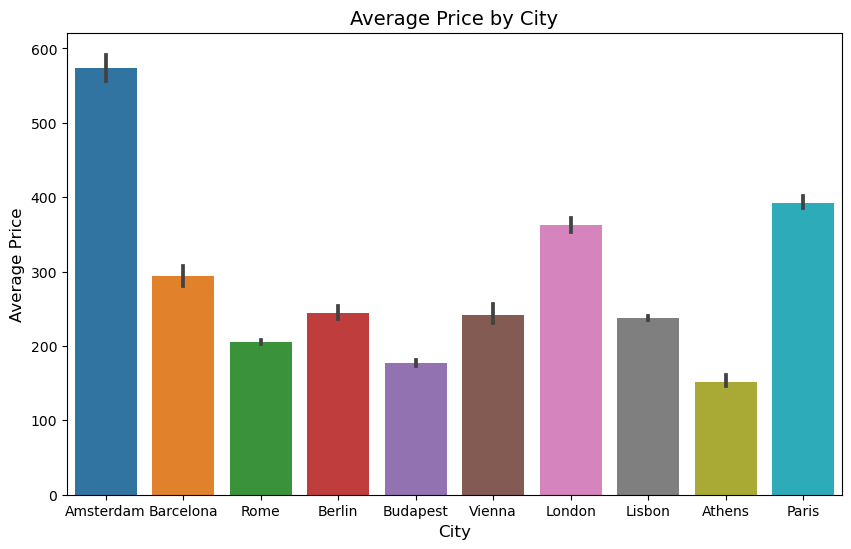

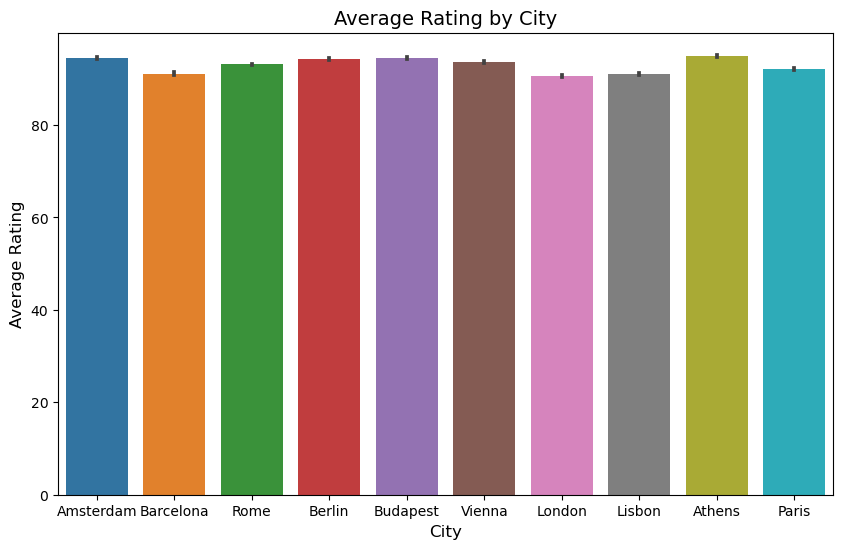

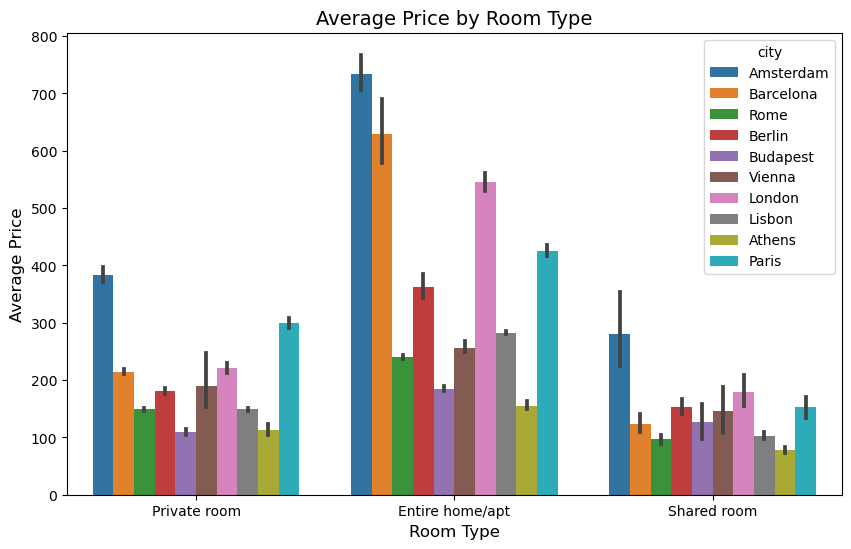

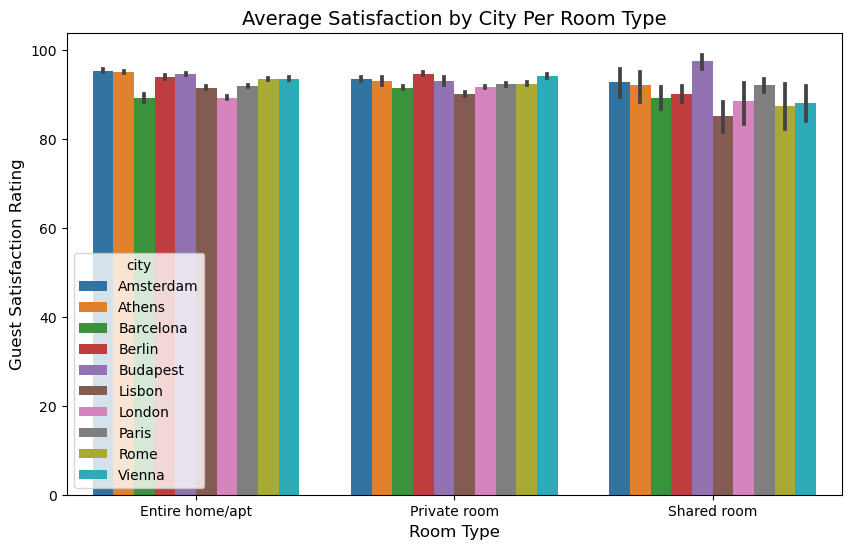

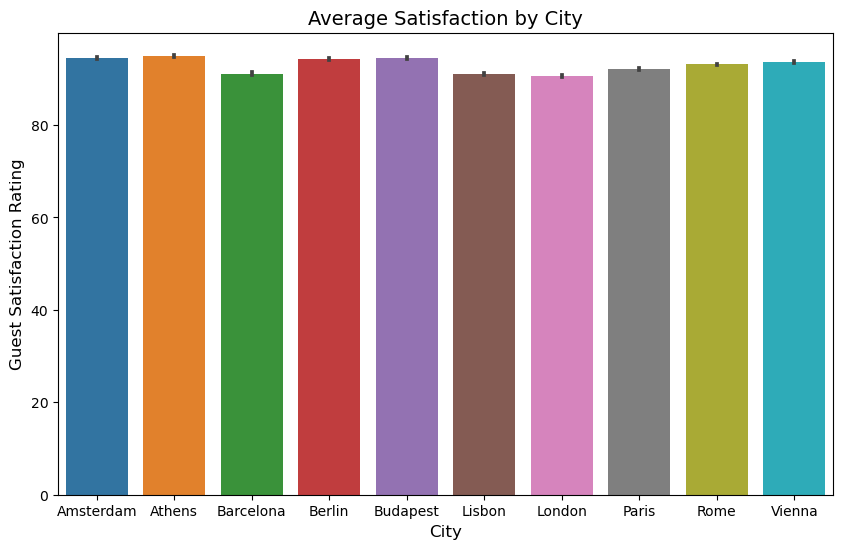

In [36]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Show the user Airbnb options in each European city
# print(df['city'].unique())

# Create a function to plot different variable comparisons
def plot_comparison(df, x, y, hue=None, title=None, xlabel=None, ylabel=None):
    """
    Plot a comparison of two variables in a dataframe.
    """
    plt.figure(figsize=(10,6))
    sns.barplot(x=x, y=y, hue=hue, data=df)
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.show()

# Create a graph comparing the average price by city
plot_comparison(df=airbnb_combined, x='city', y='realSum', title='Average Price by City', xlabel='City', ylabel='Average Price')

# Create a graph comparing the average rating by city
plot_comparison(df=airbnb_combined, x='city', y='guest_satisfaction_overall', title='Average Rating by City', xlabel='City', ylabel='Average Rating')

# Create a graph comparing the average price by room type
plot_comparison(df=airbnb_combined, x='room_type', y='realSum', title='Average Price by Room Type', xlabel='Room Type', ylabel='Average Price', hue='city')

plot_comparison(df=room_citydf, x='room_type', y='guest_satisfaction_overall', title='Average Satisfaction by City Per Room Type', xlabel='Room Type', ylabel='Guest Satisfaction Rating', hue='city')

plot_comparison(df=room_citydf, x='city', y='guest_satisfaction_overall', title='Average Satisfaction by City', xlabel='City', ylabel='Guest Satisfaction Rating')

In [37]:
x = neuraldf[['norm_price','room_type','room_shared','room_private','host_is_superhost','multi','biz','norm_cleanliness_rating','norm_bedrooms','norm_dist','norm_metro_dist','weekend']].values
y = neuraldf['norm_rating'].values

In [38]:
%matplotlib inline
import numpy as np
import random
import matplotlib.pylab as plt
from scipy.interpolate import interp1d
from sklearn.model_selection import train_test_split

In [39]:
# Miscellaneous functions
def sigmoid(z):
    """The sigmoid function."""
    return 1 / (1 + np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z) * (1 - sigmoid(z))

def step(z, threshold=0.5):
    if z > threshold:
        return 1
    return 0

# Feed forward neural network class
class Network(object):

    def __init__(self, sizes):
        """The list ``sizes`` contains the number of neurons in the
        respective layers of the network.  For example, if the list
        was [2, 3, 1] then it would be a three-layer network, with the
        first layer containing 2 neurons, the second layer 3 neurons,
        and the third layer 1 neuron.  The biases and weights for the
        network are initialized randomly, using a Gaussian
        distribution with mean 0, and variance 1.  Note that the first
        layer is assumed to be an input layer, and by convention we
        won't set any biases for those neurons, since biases are only
        ever used in computing the outputs from later layers."""
        
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, a):
        """Return the output of the network if ``a`` is input."""
        
       
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a) + b)
        return a
    
    
    def SGD(self, training_data, epochs, mini_batch_size, eta, test_data=None, silent=False):
        """Train the neural network using mini-batch stochastic
        gradient descent.  The ``training_data`` is a list of tuples
        ``(x, y)`` representing the training inputs and the desired
        outputs.  ``epochs`` represents the number of training iterations
        over the training data.  ``eta`` is the learning rate.
        If ``test_data`` is provided then the
        network will be evaluated against the test data after each
        epoch, and partial progress printed out.  This is useful for
        tracking progress, but slows things down substantially."""
        
        n = len(training_data)
        if test_data:
            n_test = len(test_data)
        
        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)
            ]
            
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            
            if not silent:
                if test_data:
                    print("Epoch {0}: {1} / {2}".format(j, self.evaluate(test_data), n_test))
                else:
                    print("Epoch {0} complete".format(j))

    def update_mini_batch(self, mini_batch, eta):
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta``
        is the learning rate."""

        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
            
        self.weights = [
            w - eta / len(mini_batch) * nw
            for w, nw in zip(self.weights, nabla_w)
        ]
        self.biases = [
            b - eta / len(mini_batch) * nb
            for b, nb in zip(self.biases, nabla_b)
        ]

    def backprop(self, x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.weights``."""
        
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return nabla_b, nabla_w

    def evaluate(self, test_data):
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network's output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""
        if self.sizes[-1] == 1:
            test_results = [
                (step(self.feedforward(x)), y)
                for x, y in test_data
            ]
        else:
            test_results = [
                (np.argmax(self.feedforward(x)), y)
                for x, y in test_data
            ]
        return sum(int(y_pred == y) for (y_pred, y) in test_results)

    def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return output_activations - y

In [40]:
airbnb_network = Network([12, 7, 1])

In [41]:
x_train, x_test, y_train, y_test, = train_test_split(x, y, test_size=0.3, random_state=0)

In [42]:
def prepare_data(X, y):
    """Format the dataset X and y so it fits with Nielsen's code."""
    return [
        (X[i].reshape(-1, 1), y[i].reshape(-1, 1))  # our tuple (x, y)
        for i in range(len(y))
    ]

In [43]:
training_data = prepare_data(x_train, y_train)
test_data = prepare_data(x_test, y_test)

In [44]:
# train net through stocastic gradient descent
airbnb_network.SGD(
    training_data,
    epochs=20,
    mini_batch_size=20,
    eta=1,
    test_data=test_data
)

# Get predictions
y_pred = []
for x in x_test:
    y_pred.append(airbnb_network.feedforward(x.reshape(-1, 1))[0][0])

Epoch 0: 3259 / 15513
Epoch 1: 3259 / 15513
Epoch 2: 3259 / 15513
Epoch 3: 3259 / 15513
Epoch 4: 3259 / 15513
Epoch 5: 3259 / 15513
Epoch 6: 3259 / 15513
Epoch 7: 3259 / 15513
Epoch 8: 3259 / 15513
Epoch 9: 3259 / 15513
Epoch 10: 3259 / 15513
Epoch 11: 3259 / 15513
Epoch 12: 3259 / 15513
Epoch 13: 3259 / 15513
Epoch 14: 3259 / 15513
Epoch 15: 3259 / 15513
Epoch 16: 3259 / 15513
Epoch 17: 3259 / 15513
Epoch 18: 3259 / 15513
Epoch 19: 3259 / 15513


In [45]:
# See the prediction results
# 0's
print(y_pred[:10])
# 1's
print(y_pred[-10:])

[0.9535661050294847, 0.9292142292662534, 0.9587627370770637, 0.9271628228859569, 0.9692090508736769, 0.8208608882539253, 0.973720222946952, 0.9597682629153585, 0.9732768585352513, 0.9288498405386062]
[0.9535661054320721, 0.9536400071160379, 0.9445143591966223, 0.972560993181353, 0.9190563534496741, 0.8783384112502542, 0.9496283759046423, 0.9562940776105829, 0.9304996328409877, 0.9752854545467879]


In [46]:
max_price_df = duckdb.query('select max(realSum) from airbnb_combined').fetchnumpy()
max_price = max_price_df['max("realSum")'][0]
max_bedrooms_df = duckdb.query('select max(bedrooms) from airbnb_combined').fetchnumpy()
max_bedrooms = float(max_bedrooms_df['max(bedrooms)'][0])
max_dist_df = duckdb.query('select max(dist) from airbnb_combined').fetchnumpy()
max_dist = max_dist_df['max(dist)'][0]
max_metro_df = duckdb.query('select max(metro_dist) from airbnb_combined').fetchnumpy()
max_metro_dist = max_metro_df['max(metro_dist)'][0]
max_bedrooms

10.0

In [47]:
def getNormValues():
    #price, room_type, room_shared, room_private, host_is_superhost, multi, biz, cleanliness_rating, num_bedrooms, dist, metro_dist, weekend
    norm_price = -1
    norm_room_type = -1
    norm_room_shared = -1
    norm_room_private = -1
    norm_host_is_superhost = -1 
    multi = -1
    biz = -1
    norm_cleanliness_rating = -1 
    norm_bedrooms = -1 
    norm_dist = -1 
    norm_metro_dist = -1 
    norm_weekend = -1 
    
    price = float(input("Enter the price of the airbnb: "))
    norm_price = price /  max_price
    
    room_type = input("Enter the type of room of the airbnb: Entire home/apt, Shared Room, or Private Room: ")
    if (room_type == 'Entire home/apt'):
        norm_room_type = 1
    elif (room_type == 'Shared Room'):
        norm_room_type = 0.5
    elif (room_type == 'Private Room'):
        norm_room_type = 0
        
    room_shared = input("Is the airbnb a shared room?  Enter True/False: ")
    if (room_shared == "True" or room_shared == "true"):
        norm_room_shared = 1
    elif (room_shared == "False" or room_shared == "false"):
        norm_room_shared = 0   
        
    room_private = input("Is the airbnb a private room?  Enter True/False: ")
    if (room_private == "True" or room_private == "true"):
        norm_room_private = 1
    elif (room_private == "False" or room_private == "false"):
        norm_room_private = 0
        
    host_is_superhost = input("Is the airbnb host a superhost?  Enter True/False: ")
    if (host_is_superhost == "True" or host_is_superhost == "true"):
        norm_host_is_superhost = 1
    elif (host_is_superhost == "False" or host_is_superhost == "false"):
        norm_host_is_superhost = 0
        
    multi = input("Does the airbnb have a listing for multiple bedrooms?  Enter True/False: ")
    if (multi == "True" or multi == "true"):
        multi = 1
    elif (multi == "False" or multi == "false"):
        multi = 0
        
    biz = input("Is the airbnb listed for business purposes?  Enter True/False: ")
    if (biz == "True" or biz == "true"):
        biz = 1
    elif (biz == "False" or biz == "false"):
        biz = 0
    
    cleanliness_rating = float(input("What is the cleanliness rating of the airbnb?  Enter a value between 1 and 10: "))
    norm_cleanliness_rating = cleanliness_rating / 10.0 #max value of 10 normalizes values from 0 to 1
    
    bedrooms = float(input("How many bedrooms does the airbnb have?: "))
    norm_bedrooms = bedrooms / max_bedrooms
    
    dist = float(input("How far is the airbnb from the center of the city?: "))
    norm_dist = dist / max_dist
    
    metro_dist = float(input("How far is the airbnb from the nearest metro station?: "))
    norm_metro_dist = metro_dist / max_metro_dist
    
    weekend = input("Is the airbnb being rented for the weekend?  Enter True/False: ")
    if (weekend == "True" or weekend == "true"):
        norm_weekend = 1
    elif (weekend == "False" or weekend == "false"):
        norm_weekend = 0
        
    return [[norm_price], [norm_room_type], [norm_room_shared], [norm_room_private], [norm_host_is_superhost], [multi], [biz], [norm_cleanliness_rating], [norm_bedrooms], [norm_dist], [norm_metro_dist], [norm_weekend]]

In [49]:
keepGoing = True
while (keepGoing == True):
    norm_rating = 0
    norm_rating = airbnb_network.feedforward(getNormValues())
    print(f'The estimated guest satisfaction rating with your given inputs is {norm_rating[0][0] * 100}.')
    
    again = input("Would you like to try another airbnb? Enter True/False: ")
    if (again == "False" or again == "false"):
        keepGoing = False
print("Thank you for using our airbnb rating feature!")

KeyboardInterrupt: Interrupted by user

In [50]:
mean_norm_price_df = duckdb.query('select avg(norm_price) from neuraldf').fetchnumpy() #mean calculation for each column 
mean_norm_price = mean_norm_price_df['avg(norm_price)'][0]

mean_norm_room_type_df = duckdb.query('select avg(room_type) from neuraldf').fetchnumpy()
mean_norm_room_type = mean_norm_room_type_df['avg(room_type)'][0]

mean_norm_room_shared_df = duckdb.query('select avg(room_shared) from neuraldf').fetchnumpy()
mean_norm_room_shared = mean_norm_room_shared_df['avg(room_shared)'][0]

mean_norm_room_private_df = duckdb.query('select avg(room_private) from neuraldf').fetchnumpy()
mean_norm_room_private = mean_norm_room_private_df['avg(room_private)'][0]

mean_norm_host_is_superhost_df = duckdb.query('select avg(host_is_superhost) from neuraldf').fetchnumpy()
mean_norm_host_is_superhost = mean_norm_host_is_superhost_df['avg(host_is_superhost)'][0]

mean_multi_df = duckdb.query('select avg(multi) from neuraldf').fetchnumpy()
mean_multi = mean_multi_df['avg(multi)'][0]

mean_biz_df = duckdb.query('select avg(biz) from neuraldf').fetchnumpy()
mean_biz = mean_biz_df['avg(biz)'][0]

mean_norm_cleanliness_rating_df = duckdb.query('select avg(norm_cleanliness_rating) from neuraldf').fetchnumpy()
mean_norm_cleanliness_rating = mean_norm_cleanliness_rating_df['avg(norm_cleanliness_rating)'][0]

mean_norm_bedrooms_df = duckdb.query('select avg(norm_bedrooms) from neuraldf').fetchnumpy()
mean_norm_bedrooms = mean_norm_bedrooms_df['avg(norm_bedrooms)'][0]

mean_norm_dist_df = duckdb.query('select avg(norm_dist) from neuraldf').fetchnumpy()
mean_norm_dist = mean_norm_dist_df['avg(norm_dist)'][0]

mean_norm_metro_dist_df = duckdb.query('select avg(norm_metro_dist) from neuraldf').fetchnumpy()
mean_norm_metro_dist = mean_norm_metro_dist_df['avg(norm_metro_dist)'][0]

mean_norm_weekend_df = duckdb.query('select avg(weekend) from neuraldf').fetchnumpy()
mean_norm_weekend = mean_norm_weekend_df['avg(weekend)'][0]

meanVector = [[mean_norm_price], [mean_norm_room_type], [mean_norm_room_shared], [mean_norm_room_private], [mean_norm_host_is_superhost], [mean_multi], [mean_biz], [mean_norm_cleanliness_rating], [mean_norm_bedrooms], [mean_norm_dist], [mean_norm_metro_dist], [mean_norm_weekend]]

In [51]:
def getWeight(column, meanVector, vecIndex):
    max_column_df = duckdb.query(f'select max({column}) from neuraldf').fetchnumpy()
    max_column = max_column_df[f'max({column})'][0]
    #return max_column
    
    min_column_df = duckdb.query(f'select min({column}) from neuraldf').fetchnumpy()
    min_column = min_column_df[f'min({column})'][0]
    tempVector = meanVector
    tempVector[vecIndex][0] = max_column
    firstValArr = airbnb_network.feedforward(tempVector)
    firstVal = firstValArr[0][0]
    
    tempVector[vecIndex][0] = min_column
    secondValArr =airbnb_network.feedforward(tempVector)
    secondVal = secondValArr[0][0]
    
    dif_rating = round(abs((firstVal - secondVal) * 100),2)
    #print(f'The rating difference for the variable {column} is {dif_rating}.')
    return dif_rating

In [52]:
index = 0
data={}
for i in neuraldf:
    if (i != 'city' and i != 'norm_rating'):
        data[i]=getWeight(i, meanVector, index)
        index = index + 1

mean_norm_rating = airbnb_network.feedforward([[mean_norm_price], [mean_norm_room_type], [mean_norm_room_shared], [mean_norm_room_private], [mean_norm_host_is_superhost], [mean_multi], [mean_biz], [mean_norm_cleanliness_rating], [mean_norm_bedrooms], [mean_norm_dist], [mean_norm_metro_dist], [mean_norm_weekend]])
mean_rating = mean_norm_rating[0][0] * 100
mean_rating

94.71059709736892

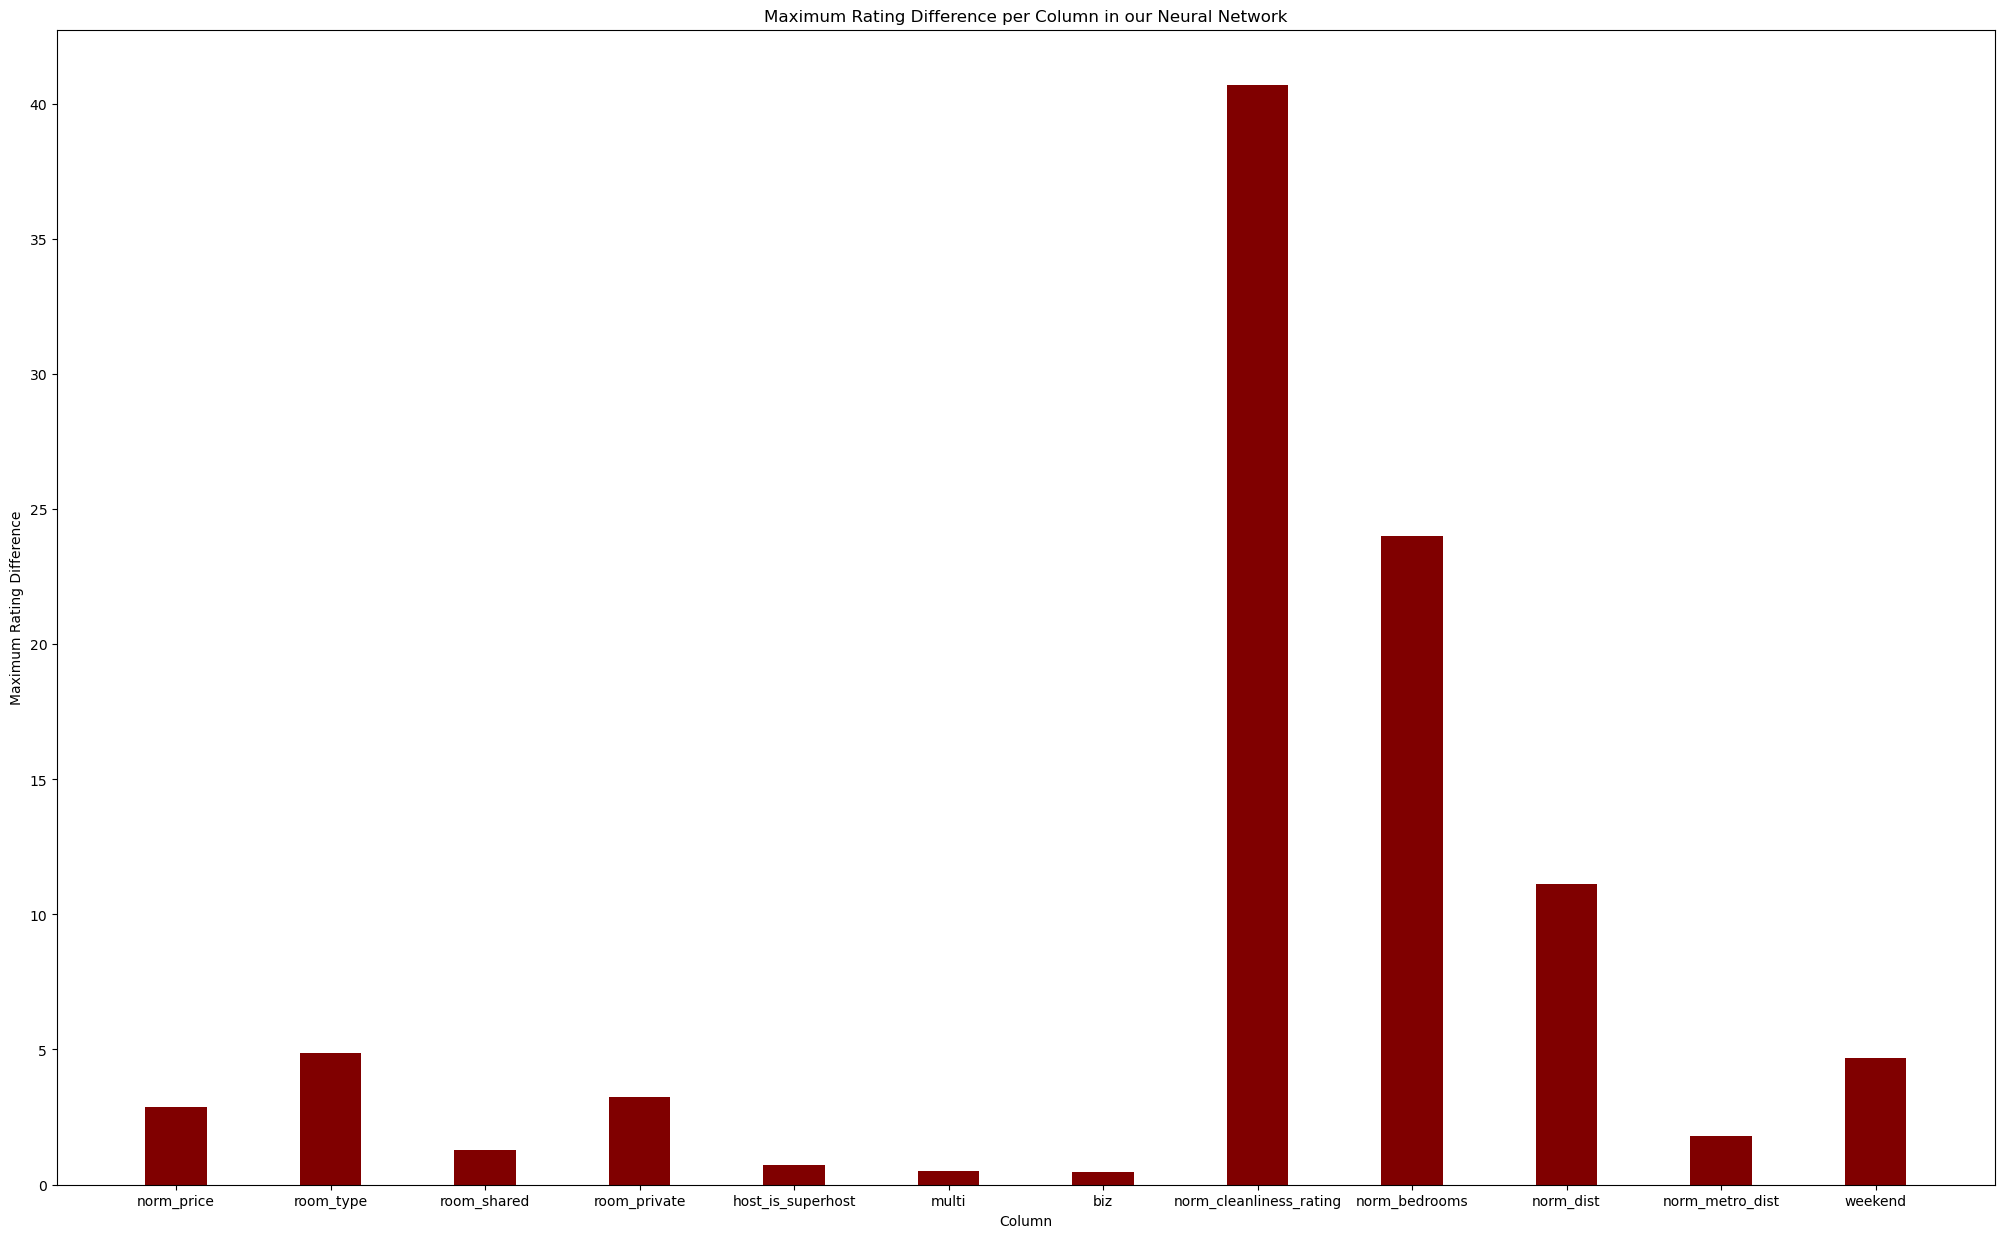

In [53]:
columns = list(data.keys())
rating_differences = list(data.values())
fig = plt.figure(figsize = (25, 15))
 
# creating the bar plot
plt.bar(columns, rating_differences, color ='maroon',
        width = 0.4)
 
plt.xlabel("Column")
plt.ylabel("Maximum Rating Difference")
plt.title("Maximum Rating Difference per Column in our Neural Network")
plt.show()

In [54]:
toTest = [0] * len(x_test[0]) #gets the number of parameters in our array
sumErrors = 0
index = 0
for i in range(len(x_test)):
    index = 0 #with each input on average our neural network is that many rating points up. 
    for j in x_test[i]:
        toTest[index] = [i]
        index = index + 1
    err = abs(airbnb_network.feedforward(toTest) - y_test[i])
    #print(err)
    sumErrors = sumErrors + err
avgErrorArr = sumErrors / len(x_test)
avgErrorRating = round(avgErrorArr[0][0] * 100, 2) #rating scales from 0 to 1 normalized, actual rating is from 0 to 100
print(f'The average error of our neural network is {avgErrorRating} rating points.')

/var/folders/f5/1cffz1zs429dv39ndcjvvt4m0000gn/T/ipykernel_2220/4237275875.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


The average error of our neural network is 6.93 rating points.
